In [1]:
# Connect to drive
%cd /content/drive/MyDrive/Data Analytics/Projects/Product Sales

/content/drive/MyDrive/Data Analytics/Projects/Product Sales


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Dataset
df = pd.read_csv('product_sales.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


Data Validation and Cleaning

In [4]:
# Check the rows and columns in the dataset before cleaning and validation
df.shape

(15000, 8)

In [5]:
# Check datatypes of all variables
df.dtypes

,0
week,int64
sales_method,object
customer_id,object
nb_sold,int64
revenue,float64
years_as_customer,int64
nb_site_visits,int64
state,object


In [6]:
# Check unique values of all variables
df.nunique()

,0
week,6
sales_method,5
customer_id,15000
nb_sold,10
revenue,6743
years_as_customer,42
nb_site_visits,27
state,50


In [7]:
# Check for missing values
df.isnull().sum()

,0
week,0
sales_method,0
customer_id,0
nb_sold,0
revenue,1074
years_as_customer,0
nb_site_visits,0
state,0


In [8]:
# List unique values of week column
df['week'].unique()

array([2, 6, 5, 4, 3, 1])

In [9]:
# List unique values of salles_method column
df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [10]:
# In the dataset, substitute observations with 'em + call' and 'email' values to 'Email + Call' and  'Email' respectively
df['sales_method'] = df['sales_method'].replace(['em + call', 'email'], ['Email + Call', 'Email'])

In [11]:
# Confirm if you have only 3 sales methods
df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call'], dtype=object)

In [12]:
# Check if customer_id column is primary key
df['customer_id'].count()

15000

In [13]:
# Describe the nb_sold column
df['nb_sold'].describe()

,nb_sold
count,15000.000000
mean,10.084667
std,1.812213
min,7.000000
25%,9.000000
50%,10.000000
75%,11.000000
max,16.000000


In [14]:
# Checkk if revenue column has a value NA
df['revenue'].isnull().sum()

1074

In [15]:
# Drop missing values in revenue column
df = df.dropna()

In [16]:
# List unique values in years_as _customer
df['years_as_customer'].unique()

array([ 1,  6,  0, 10,  9,  7,  4,  2, 20,  8,  5, 17, 36,  3, 15, 14, 19,
       13, 12, 11, 30, 22, 18, 23, 32, 16, 39, 25, 33, 21, 31, 24, 27, 34,
       28, 26, 29, 35, 38, 37, 63, 47])

In [17]:
# Describe years_as _customer
df['years_as_customer'].describe()

,years_as_customer
count,13926.000000
mean,4.978960
std,5.047828
min,0.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,63.000000


In [18]:
# In years_as _customer column drop rows with values greater than 40
df = df[df['years_as_customer'] <= 40]

In [19]:
# List unique values in nb_site_visits
df['nb_site_visits'].unique()

array([28, 26, 24, 22, 31, 23, 30, 25, 21, 27, 29, 20, 18, 19, 35, 32, 16,
       17, 33, 34, 15, 37, 36, 14, 13, 12])

In [20]:
# List unique values of state
df['state'].unique()

array(['Kansas', 'Wisconsin', 'Illinois', 'Mississippi', 'Georgia',
       'Oklahoma', 'Massachusetts', 'Missouri', 'Texas', 'New York',
       'Maryland', 'California', 'Tennessee', 'North Dakota', 'Florida',
       'Michigan', 'North Carolina', 'Pennsylvania', 'Indiana', 'Hawaii',
       'Colorado', 'Louisiana', 'Virginia', 'Arkansas', 'Alaska',
       'Oregon', 'New Hampshire', 'Ohio', 'New Jersey', 'Connecticut',
       'Iowa', 'Montana', 'Washington', 'Arizona', 'Kentucky', 'Alabama',
       'Nebraska', 'South Carolina', 'Minnesota', 'South Dakota', 'Maine',
       'Utah', 'West Virginia', 'Vermont', 'New Mexico', 'Rhode Island',
       'Nevada', 'Delaware', 'Idaho', 'Wyoming'], dtype=object)

In [21]:
# Check the shape of the cleaned and validated dataset
df.shape

(13924, 8)

Exploratory Data Analysis

In [22]:
# Customer count by Sales Method
df['sales_method'].value_counts()

,count
sales_method,
Email,6921
Call,4780
Email + Call,2223


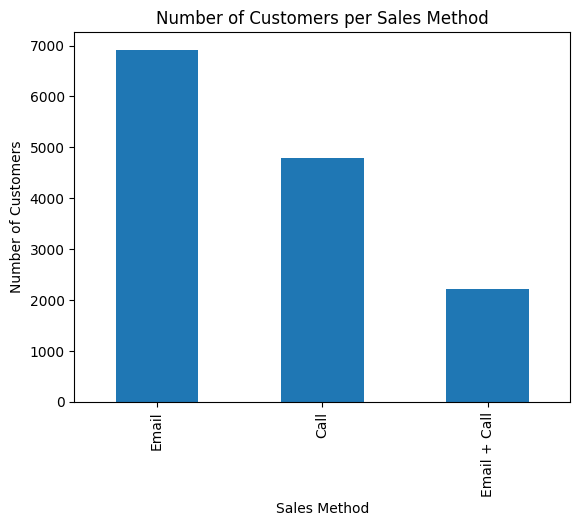

In [23]:
# Plot a bar graph of Customer count by Sales Method with chart and axis titles
df['sales_method'].value_counts().plot(kind='bar', title='Number of Customers per Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')
plt.show()

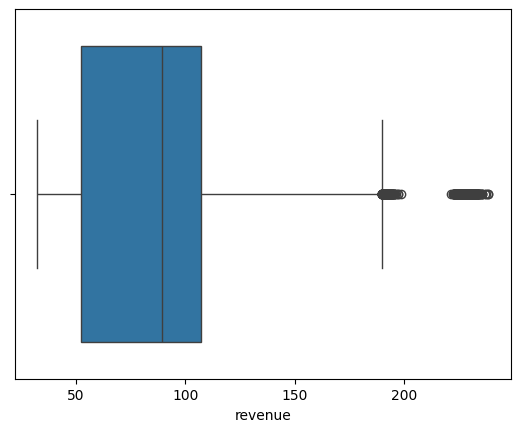

In [24]:
# Boxplot to represent the Overall revenue spread
sns.boxplot(x=df['revenue'])
plt.show()

In [25]:
# Describe revenue
df['revenue'].describe()

,revenue
count,13924.000000
mean,93.937828
std,47.437281
min,32.540000
25%,52.470000
50%,89.500000
75%,107.330000
max,238.320000


In [26]:
# Total revenue
df['revenue'].sum()

1307990.32

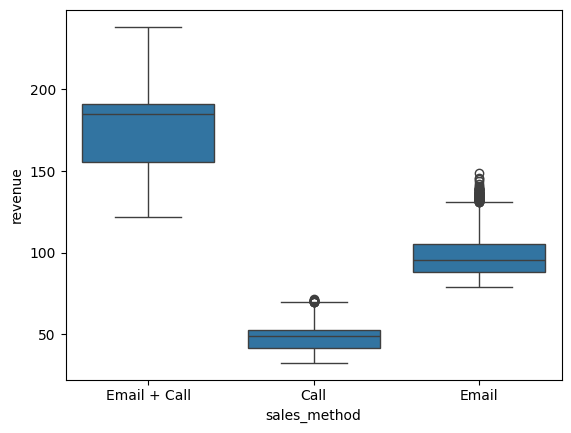

In [27]:
# Boxplot to represent the revenue spread per sales method
sns.boxplot(x=df['sales_method'], y=df['revenue'])
plt.show()

In [28]:
# Describe revenue by sales_method
df.groupby('sales_method')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
sales_method,,,,,,,,
Call,4780.0,47.596866,8.610699,32.54,41.470,49.05,52.68,71.36
Email,6921.0,97.127671,11.211279,78.83,87.880,95.58,105.17,148.97
Email + Call,2223.0,183.651233,29.083924,122.11,155.775,184.74,191.11,238.32


In [29]:
# Sum of total revenue by sales_method
df.groupby('sales_method')['revenue'].sum()

,revenue
sales_method,
Call,227513.02
Email,672220.61
Email + Call,408256.69


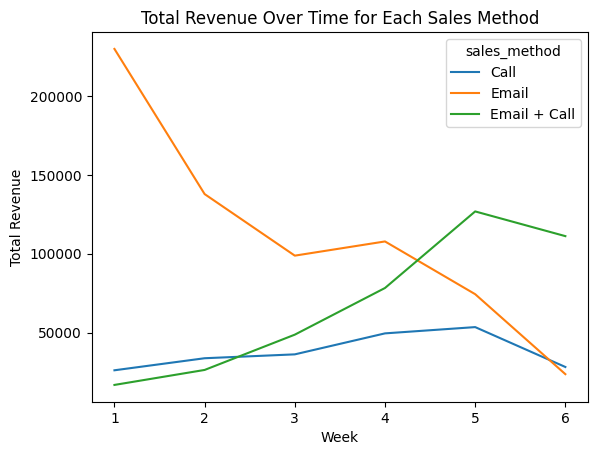

In [30]:
# Line graph to show the total revenue over time for each sales_method
df.groupby(['week', 'sales_method'])['revenue'].sum().unstack().plot(kind='line')
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Over Time for Each Sales Method')
plt.show()

In [31]:
# Total revenue per week for each sales_method
df.groupby(['week', 'sales_method'])['revenue'].sum()

week  sales_method
1     Call             26159.18
      Email           229765.55
      Email + Call     16885.33
2     Call             33792.02
      Email           137794.35
      Email + Call     26376.23
3     Call             36247.27
      Email            98792.14
      Email + Call     48737.14
4     Call             49543.52
      Email           107788.37
      Email + Call     78296.20
5     Call             53518.11
      Email            74373.45
      Email + Call    126809.72
6     Call             28252.92
      Email            23706.75
      Email + Call    111152.07
Name: revenue, dtype: float64